In [1]:
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

In [2]:
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [3]:
import os
import io
import numpy as np

In [4]:
def get_news_information(image_path):
    news_information = {}
    with zipfile.ZipFile(image_path) as zippedImgs:
        for fname in zippedImgs.namelist():
            with zippedImgs.open(fname) as imgFile:
                cv_img = cv.imdecode(np.frombuffer(imgFile.read(), np.uint8), 1)
                gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                img = Image.open(imgFile)
                text = pytesseract.image_to_string(img)
                news_information[fname] = (img, text, faces)
    return news_information

In [5]:
small_images_news_information = get_news_information('/home/jovyan/work/readonly/small_img.zip')

In [6]:
images_news_information = get_news_information('/home/jovyan/work/readonly/images.zip')

In [7]:
def detect_faces(search_word, news_information):
    contact_img_height = 100
    contact_img_width = 100
    for fname in news_information.keys():
        text = news_information[fname][1]
        if search_word in text:
            print('Results found in file', fname)
            faces = news_information[fname][2]
            if len(faces) < 1:
                print('But there were no faces in that file!')
                continue
            num_rows = int(np.ceil(len(faces) / 5))
            contact_sheet = Image.new('RGB', (5*contact_img_width, num_rows*contact_img_height))
            img = news_information[fname][0]
            face_imgs = []
            for face in faces:
                cropped_img = img.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
                face_imgs.append(cropped_img)
            x=0
            y=0
            for face_img in face_imgs:
                face_img_width = face_img.width
                face_img_height = face_img.height
                if (face_img_width > contact_img_width) or (face_img_height > contact_img_height):
                    contact_sheet.paste(face_img.resize((contact_img_width, contact_img_height)), (x, y) )
                else:
                    contact_sheet.paste(face_img, (x, y) )
                if x+contact_img_width == contact_sheet.width:
                    x=0
                    y=y+contact_img_height
                else:
                    x=x+contact_img_width
            display(contact_sheet)

Results found in file a-0.png


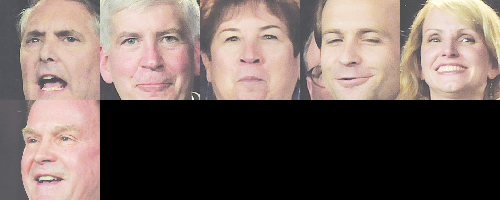

Results found in file a-3.png


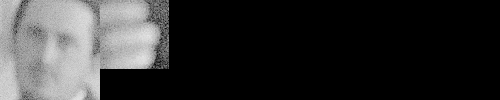

In [8]:
detect_faces(search_word = "Christopher", news_information = small_images_news_information)

Results found in file a-0.png


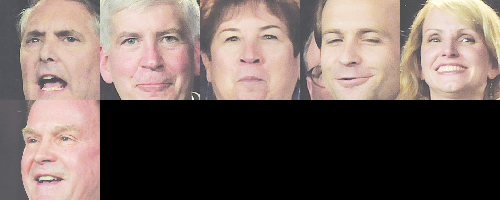

Results found in file a-1.png


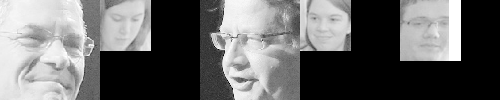

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


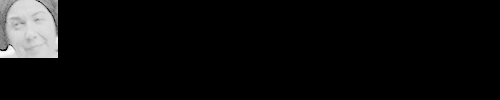

Results found in file a-2.png


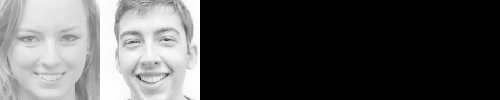

Results found in file a-3.png


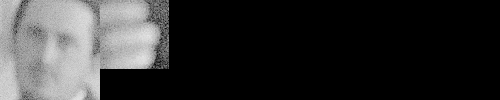

Results found in file a-8.png
But there were no faces in that file!


In [9]:
detect_faces(search_word = "Mark", news_information = images_news_information)